In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/DataSet 5RoutingMetrics VANET BCN.csv')
data.head()

,ABE,TJR,NV,DST,LMAC,OUT
0,0.607974,0.162775,1.0,0.522293,97.473611,0
1,0.809746,0.234375,1.0,1.000000,57.096114,0
2,0.555712,0.198975,1.0,0.494737,-25.042838,0
3,0.898466,0.268975,1.0,0.846847,-20.710472,0
4,0.912069,0.162775,1.0,0.522293,-19.676162,0


In [4]:
data.isnull().sum()

,0
ABE,0
TJR,0
NV,0
DST,0
LMAC,0
OUT,0


In [30]:
data.describe()

,ABE,TJR,NV,DST,LMAC,OUT
count,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000
mean,0.785166,0.209519,0.664923,0.897953,0.503761,0.413533
std,0.298644,0.133502,1.990258,0.287546,2.241003,0.492509
min,0.014914,0.000000,0.000344,0.000000,-25.042838,0.000000
25%,0.637084,0.116400,0.211540,0.984615,0.065179,0.000000
50%,0.962590,0.171900,0.512265,1.000000,0.346956,0.000000
75%,0.989147,0.302775,1.000000,1.000000,1.000000,1.000000
max,0.999764,0.651900,110.603670,1.000000,110.604016,1.000000


In [31]:
data.dtypes

,0
ABE,float64
TJR,float64
NV,float64
DST,float64
LMAC,float64
OUT,int64


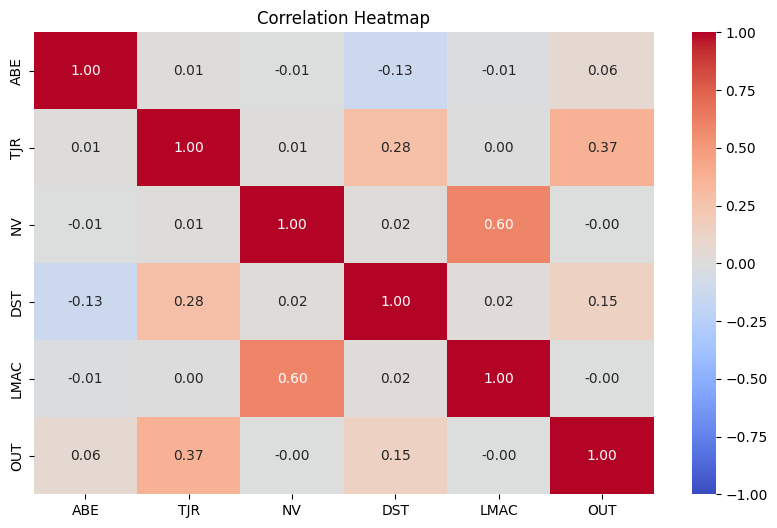

In [35]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()



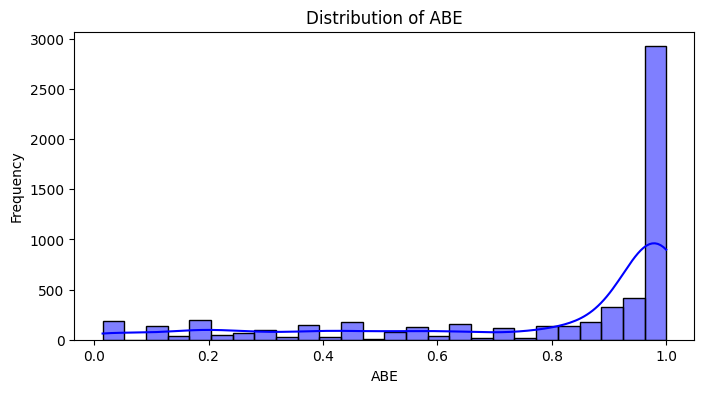

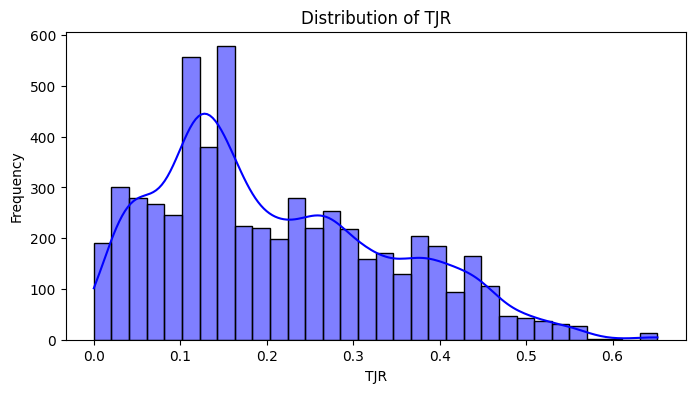

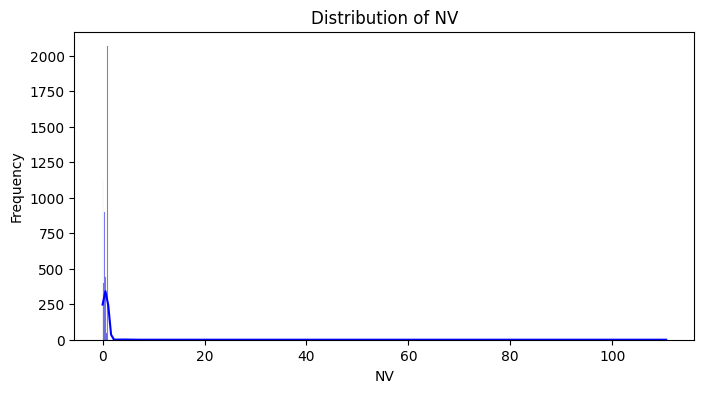

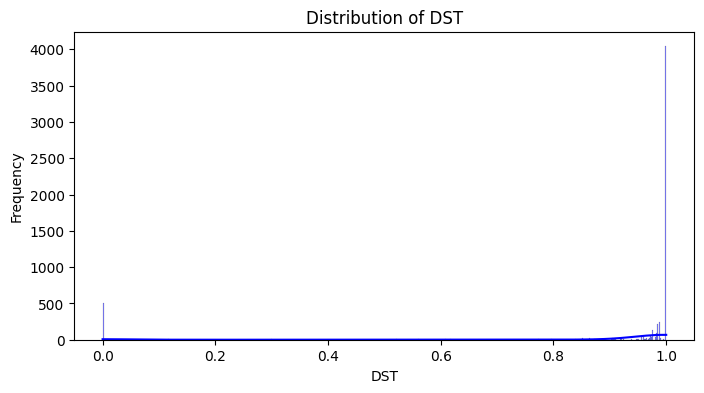

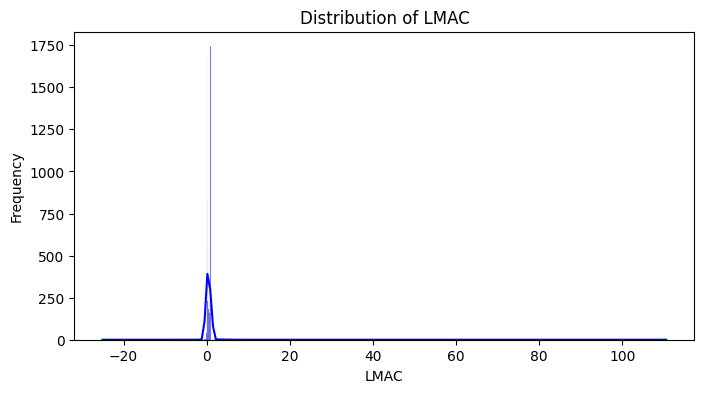

In [36]:
numerical_features = ['ABE', 'TJR', 'NV', 'DST', 'LMAC']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [5]:
X = data.drop('OUT', axis=1)
y = data['OUT']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data[['ABE', 'TJR', 'NV', 'DST', 'LMAC']].values
y = data['OUT'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
y_train_counts = np.unique(y_train, return_counts=True)
y_test_counts = np.unique(y_test, return_counts=True)
print(y_train_counts)
print(y_test_counts)

(array([0, 1]), array([2757, 1901]))
(array([0, 1]), array([658, 507]))


In [46]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    verbose=1, shuffle=True)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6758 - loss: 0.6151 - val_accuracy: 0.6931 - val_loss: 0.5592
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7177 - loss: 0.5517 - val_accuracy: 0.7242 - val_loss: 0.5475
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7395 - loss: 0.5203 - val_accuracy: 0.7242 - val_loss: 0.5201
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7570 - loss: 0.4982 - val_accuracy: 0.7285 - val_loss: 0.5163
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7437 - loss: 0.5092 - val_accuracy: 0.7253 - val_loss: 0.5230
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7577 - loss: 0.4930 - val_accuracy: 0.7403 - val_loss: 0.4997
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7711 - loss: 0.4853 - val_accuracy: 0.7328 - val_loss: 0.5025
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7793 - loss: 0.4753 - val_accuracy: 0.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Accuracy: 0.8215
Test Precision: 0.7996
Test Recall: 0.7870
Test F1 Score: 0.7932


Text(0.5, 1.0, 'Confusion Matrix')

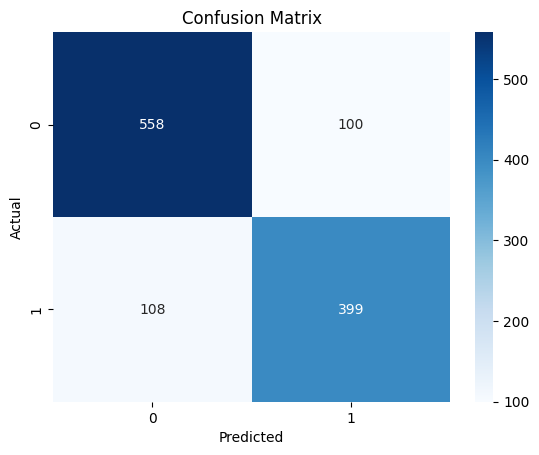

In [48]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_binary), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [50]:
model.save('vanet_classifier.h5')
